In [1]:
import Assembler as tmk
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

alpha =  0.5 
delta =  0.5
beta  =  0.005
gamma =  0.005

x1 = 150
x2 = 75

k_values = {
            'alpha' : alpha,
            'beta'  : beta,
            'gamma' : gamma,
            'delta' : delta,         
        }

propensities = {
                'R1'  : 'alpha * x1',
                'R2'  : 'beta  * x1 * x2',
                
                'R3'  : 'gamma * x1 * x2',
                'R4'  : 'delta * x2',
            }

species = {
        'x1':    x1,
        'x2':    x2
}

reactions = {

    'R1':  {'create' :  ['x1']},
    'R2':  {'destroy':  ['x1']},
    
    'R3':  {'create' :  ['x2']},
    'R4':  {'destroy':  ['x2']},
}

simulation_parameters = {
    'tmax': 100.,
    'sampling_time': 1.,
    'cells': 1000.
}

model = tmk.ToyModel(toy_name='lvs_simple')
model.setup(species, reactions, propensities, k_values, simulation_parameters)

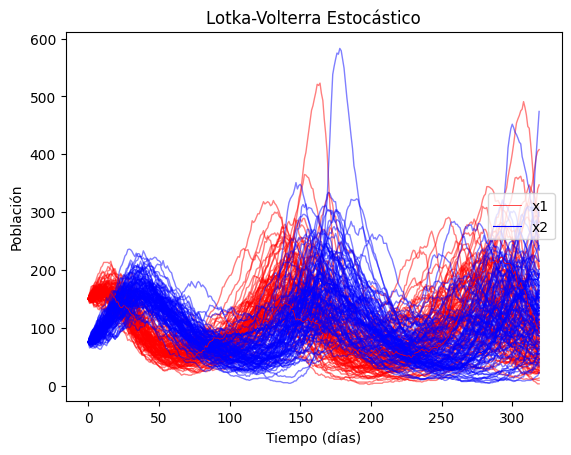

In [9]:
import models.lvs_simple as lvs_simple

cells = 100
population = np.array(lvs_simple.run_population(tmax=32, sampling_time=0.1, cells=cells))

x1_sol = [population[c][:,2] for c in range(cells)];
x2_sol = [population[c][:,3] for c in range(cells)];

[plt.plot(x1_sol[c], color='red', lw=1, alpha=0.5) for c in range(cells)];
[plt.plot(x2_sol[c], color='blue', lw=1, alpha=0.5) for c in range(cells)];

plt.plot(x1_sol[0], color='red', lw=0.5, label='x1' )
plt.plot(x2_sol[0], color='blue', lw=0.8, label='x2')
plt.title('Lotka-Volterra Estocástico')
plt.ylabel('Población')
plt.xlabel('Tiempo (días)')
plt.legend(loc=5)

In [1]:
import Assembler as tmk
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt


α1 = 1
α2 = 0.25

# β1 = 1
# β2 = 0.001

# k1 = 200
# k2 = 200

# x1 = 10
# x2 = 150

# α1 = 0.051
# α2 = 0.051

β1 = 0.0001
β2 = 0.0001

k1 = 500
k2 = 500

γ1 = 1/15
γ2 = 1/15

x1 = 400
x2 = 400

ε1 = 0.0005
ε2 = 0.0001

k_values = {
            'α1' : α1,
            'α2' : α2,
            'β1' : β1,
            'β2' : β2,
            'k1' : k1,
            'k2' : k2,
            'γ1' : γ1,
            'γ2' : γ2,
            'ε1' : ε1,
            'ε2' : ε2            
        }

propensities = {
                'R1'  : '(1 - (x1/k1)) * x1 * α1',
                'R2'  : 'x1 * x2 * β1',
                'R3'  : '(1 - (x2/k2)) * x2 * α2',
                'R4'  : 'x2 * x1 * β2',
                'R5'  : 'γ1 * x1',
                'R6'  : 'γ2 * x2',
                'R7'  : 'ε1 * z * x1',
                'R8'  : 'ε2 * z * x2',
            }

species = {
        'x1':    x1,
        'x2':    x2,
        'z' :    1500.
}

reactions = {

    'R1':  {'create' :  ['x1']},
    'R2':  {'destroy':  ['x1']},
    
    'R3':  {'create' :  ['x2']},
    'R4':  {'destroy':  ['x2']},
    
    'R5':  {'destroy':  ['x1']},
    'R6':  {'destroy':  ['x2']},
    
    'R7':  {'destroy':  ['x1', 'z']},
    'R8':  {'destroy':  ['x2', 'z']},
}

simulation_parameters = {
    'tmax': 100.,
    'sampling_time': 1.,
    'cells': 1000.
}

model = tmk.ToyModel(toy_name='lvs')
model.setup(species, reactions, propensities, k_values, simulation_parameters)

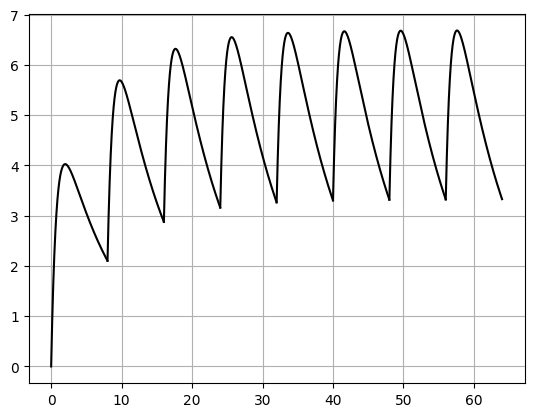

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def Z(t, n_dosis, t0):
    k_a = 1.3
    k_e = 1/8

    d = 1000
    F = 0.031

    A = np.exp(-k_a*t0)
    B = np.exp(-k_e*t0)
    n = n_dosis
    
    V = 6
    parte_a = ((k_a * d * F)/(V * (k_a - k_e))) * ((1 - (B**n))/(1 - B)) * np.exp(-k_e * (t - ((n - 1) * t0)))
    parte_b = ((k_a * d * F)/(V * (k_a - k_e))) * ((1 - (A**n))/(1 - A)) * np.exp(-k_a * (t - ((n - 1) * t0)))

    z = parte_a - parte_b
    return z

for i in range(0, 8):
    t = np.arange(8*i, 8 + 8*i, 0.01)
    plt.plot(t, Z(t, i+1, 8), color='black')
    plt.grid(True)


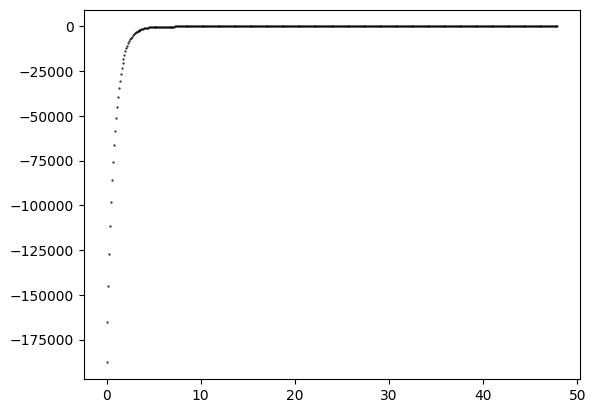

In [25]:
def Z(t, t0=8, n_dosis = 1):
	if t >= (t0*n_dosis): # Upper limit
		n_dosis += 1
  
	k_a = 1.3
	k_e = 1/8
	d = 1000
	F = 0.031

	A = np.exp(-k_a*t0)
	B = np.exp(-k_e*t0)
	n = n_dosis
	
	V = 6 # Volumen en sangre
 
	parte_a = ((k_a * d * F)/(V * (k_a - k_e))) * ((1 - (B**n))/(1 - B)) * np.exp(-k_e * (t - ((n - 1) * t0)))
	parte_b = ((k_a * d * F)/(V * (k_a - k_e))) * ((1 - (A**n))/(1 - A)) * np.exp(-k_a * (t - ((n - 1) * t0)))
	z = parte_a - parte_b
	return z, n_dosis

t = np.arange(0, 48, 0.1)
[plt.plot(t[i], Z(t[i], ), color='black', marker='o', ms=0.5) for i in range(len(t))];

In [3]:
import models.lvs_multidosis as lvs
import numpy as np
import matplotlib.pyplot as plt

cells = 200
population = np.array(lvs.run_population(tmax=300, sampling_time=1., cells=cells))
print(population.shape)
x1_sol = [population[c][:,2] for c in range(cells)];
x2_sol = [population[c][:,3] for c in range(cells)];
z_sol = [population[c][:,4] for c in range(cells)];

(200, 300, 5)


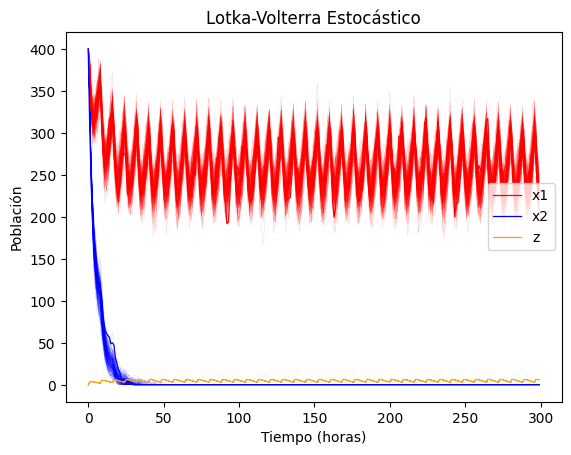

In [4]:
[plt.plot(x1_sol[c], color='red', lw=0.1, alpha=0.5) for c in range(cells)];
[plt.plot(x2_sol[c], color='blue', lw=0.1, alpha=0.5) for c in range(cells)];
[plt.plot(z_sol[c], color='orange', lw=0.1, alpha=0.5) for c in range(cells)];

plt.plot(x1_sol[0], color='red', lw=0.9, label='x1' )
plt.plot(x2_sol[0], color='blue', lw=0.9, label='x2')
plt.plot(z_sol[0], color='orange', lw=0.9, label='z')
plt.title('Lotka-Volterra Estocástico')
plt.ylabel('Población')
plt.xlabel('Tiempo (horas)')
plt.legend(loc=5)
# plt.xlim(1350, 1500)
# plt.ylim(-1, 20)

In [21]:
np.array(x2_sol).shape

(1000, 1200)

(array([0.0002, 0.0012, 0.0042, 0.0082, 0.0205, 0.0266, 0.0194, 0.0133,
        0.0054, 0.001 ]),
 array([219., 229., 239., 249., 259., 269., 279., 289., 299., 309., 319.]),
 <BarContainer object of 10 artists>)

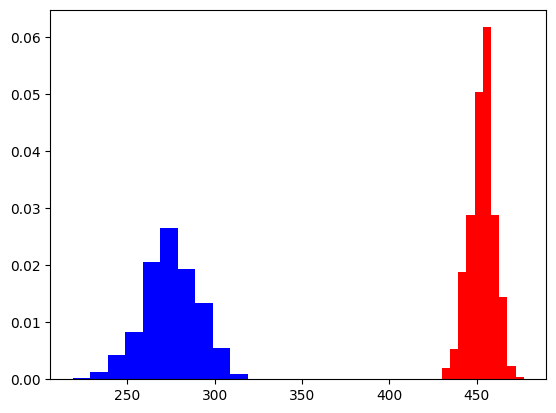

In [29]:
plt.hist(np.array(x1_sol).T[500], color='red', density=True)
plt.hist(np.array(x2_sol).T[500], color='blue', density=True)